In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
year_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
year_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [7]:
df = pd.concat([year_2000, year_2001], ignore_index=True)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.10,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2162.0,PG


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2544 non-null   object 
 1   adult                  2542 non-null   float64
 2   backdrop_path          1369 non-null   object 
 3   belongs_to_collection  203 non-null    object 
 4   budget                 2542 non-null   float64
 5   genres                 2542 non-null   object 
 6   homepage               171 non-null    object 
 7   id                     2542 non-null   float64
 8   original_language      2542 non-null   object 
 9   original_title         2542 non-null   object 
 10  overview               2491 non-null   object 
 11  popularity             2542 non-null   float64
 12  poster_path            2283 non-null   object 
 13  production_companies   2542 non-null   object 
 14  production_countries   2542 non-null   object 
 15  rele

In [9]:
filter_financial = (df['budget'] > 0) | (df['revenue']>0)

In [11]:
filter_financial.value_counts()

False    1911
True      633
dtype: int64

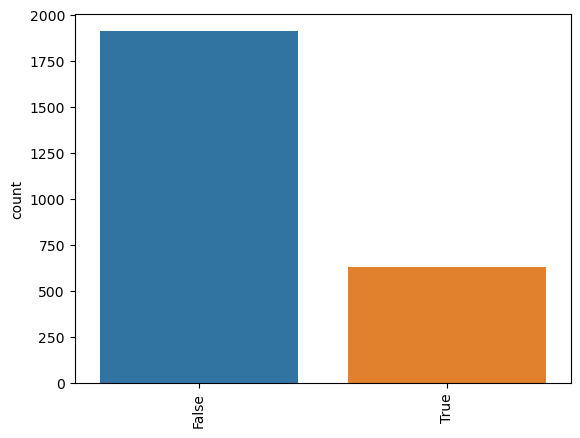

In [13]:
sns.countplot(x = filter_financial)
plt.xticks(rotation=90)
plt.title('');

In [16]:
plot_df = df[filter_financial]

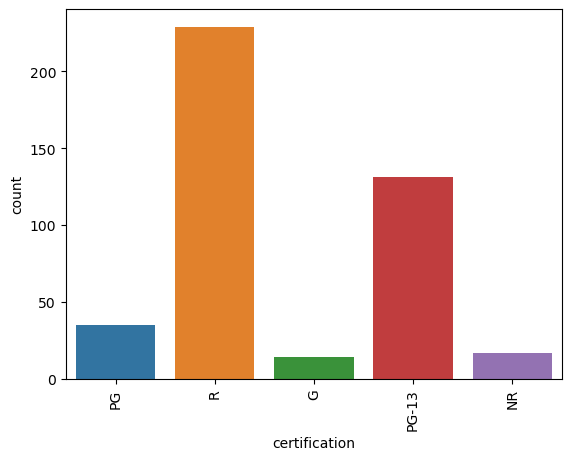

In [17]:
sns.countplot(data = plot_df, x = 'certification')
plt.xticks(rotation=90)
plt.title('');

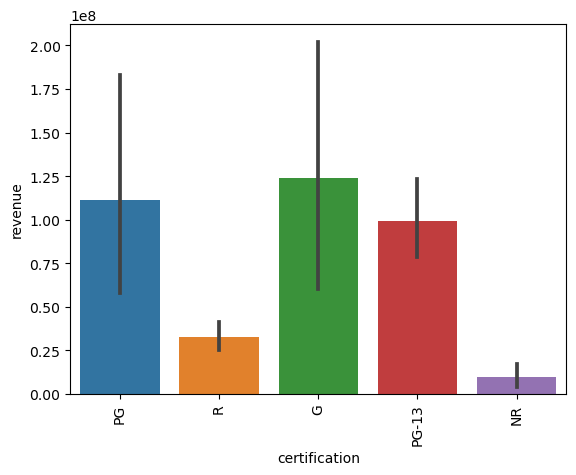

In [18]:
sns.barplot(data = plot_df, x = 'certification', y = 'revenue')
plt.xticks(rotation=90)
plt.title('');

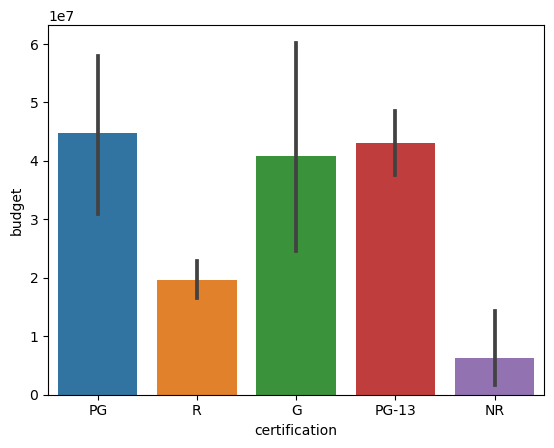

In [19]:
sns.barplot(x='certification',
           y='budget',
           data = plot_df)
plt.show();

In [20]:
## Save current dataframe to file.
df.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)